<a href="https://colab.research.google.com/github/poojitagarg/Covid19_analysis/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [0]:
#reading the data and creating a new column
covid_data=pd.read_csv('Covid19.csv').values
print(covid_data)
covid_data=np.c_[covid_data,np.zeros((len(covid_data),1))]

In [0]:
#creating a csv file for new cases per state per date
covid_data[0,-1]=covid_data[0,-2]
for i in range(1,len(covid_data)):   
  for j in range(i-1,-1,-1):
    if covid_data[i,1]==covid_data[j,1]:
      covid_data[i,-1]=covid_data[i,-2]-covid_data[j,-2]
      break
    covid_data[i,-1]=covid_data[i,-2]
print(covid_data[:,-1])
pd.DataFrame(covid_data).to_csv("file999.csv")

[1 0 1 ... 247 2 78]


In [0]:
# creating a dictionary to store new cases per date
date_to_new_cases={}
for i in range(0,len(covid_data)):
  if covid_data[i,0] not in date_to_new_cases:
    date_to_new_cases[covid_data[i,0]]=covid_data[i,-1]
    for j in range(i+1,len(covid_data)):
      if covid_data[j,0]==covid_data[i,0]:
        
        date_to_new_cases[covid_data[i,0]]+=covid_data[j,-1]
  else:
    pass
#dictionary to array
dd = list(date_to_new_cases.items())
Ar= np.array(dd)
Ar=pd.DataFrame({"d":Ar[:,0], 
                 "N":Ar[:,1]}) 
print(Ar)
#creating a vector N for the new cases and D for the dates
N=np.zeros(len(Ar))
D=np.zeros(len(Ar))
N=Ar.N.values
D=Ar.d.values
for i in range(0, len(N)): 
  N[i] = int(float(N[i])) 
print(N)

             d     N
0   2020-01-30     1
1   2020-01-31     0
2   2020-02-01     1
3   2020-02-02     1
4   2020-02-03     0
..         ...   ...
84  2020-04-23  1409
85  2020-04-24  1684
86  2020-04-25  1429
87  2020-04-26  1778
88  2020-04-27  1608

[89 rows x 2 columns]
[1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 21 2
 1 3 5 7 12 12 6 1 9 27 3 23 14 22 22 103 77 73 86 87 88 30 185 71 91 288
 464 131 329 625 466 693 354 773 540 678 1035 909 796 1652 635 941 1455
 543 1334 1553 1336 1383 1409 1684 1429 1778 1608]
89


In [0]:
#function to calculate moving average
S=np.zeros(len(Ar))
def moving_avg(Beta):
  S[0]=0
#For each date calculate moving average in this way
  for i in range(1,len(Ar)):
    S[i]= Beta*S[i-1] + (1-Beta)*N[i]
  return S


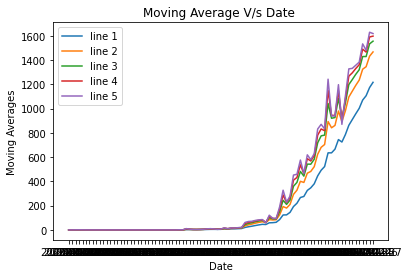

In [0]:
#graph to plot the moving averages through a line graph
Y=D
P=moving_avg(0.9)
plt.plot(Y, P, label = "line 1")
Q=moving_avg(0.8)
plt.plot(Y, Q, label = "line 2")
R=moving_avg(0.7)
plt.plot(Y, R, label = "line 3")
T=moving_avg(0.6)
plt.plot(Y, T, label = "line 4")
U=moving_avg(0.5)
plt.plot(Y, U, label = "line 5")
plt.xlabel('Date')
plt.ylabel('Moving Averages')
plt.title('Moving Average V/s Date ')
plt.legend()
plt.show()